#PROGRAMA DE ESPECIALIZACIÓN DE CIENCIA DE DATOS

--------------------------------------------------------
Proyecto N° 1

Alumno: Rainier Moreno Cueva

E-mail: rmorenocueva@gmail.com

In [25]:
#importamos las librerias a utilizar
import numpy as np
import pandas as pd
from datetime import datetime

# Solución

## Ejercicio 1

Escribir un programa que pregunte al usuario por las ventas de los
últimos 5 días, y muestre por pantalla una serie con los datos de
las ventas por producto: Nro de unidades y precio unitario,
indexada por los días, antes y después de aplicarles un descuento
del 5%.

In [41]:
ahora = datetime.today().strftime('%Y%m%d')             # Almacenamos la fecha de hoy
hace5dias=ahora[:6]+str(int(ahora[6:])-5)               # Almacenamos la fecha de los últimos 5 días

Construimos la dataframe de los datos de las ventas de los últimos 5 días

In [46]:
Producto=['PS4', 'XBOX', 'Nintendo', 'XBOXONE', 'PS5']  # Productos
Ventas=[30500, 35600, 28300, 33900, 42500]              # Monto de Ventas
Unidades=[250, 240, 180, 350, 320]                      # Unidades vendidas
data1=np.array([Producto, Ventas, Unidades])            # Construimos nuestro array a partir de las listas
df5 = pd.DataFrame(
    data=data1.T,                                       # Construimos nuestra dataframe en base a la transpuesta de la array
    index=pd.date_range(hace5dias, periods=5),          # Indexamos en base a las fechas de los últimos 5 días
    columns=["Producto", "Ventas", "Unidades"])         # Nombramos las columnas
#df5                                                    # Mostramos los datos contruidos

In [28]:
def ventas(arg):                                        # Definimos nuestra función
  return arg                                            # Le indicamos que retorne el argumento

In [47]:
Pregunta = input(                                       
    '¿Cuales son las ventas de los últimos 5 días?:')   # Construimos la pregunta
data2=eval(ventas(Pregunta))                            # El argumento devuelto lo convertimos en una variable y lo asignamos un identificador
data2['Ventas'] = data2['Ventas'].astype('int')         # Indicamos el tipo de dato para cada columna
data2['Unidades'] = data2['Unidades'].astype('int')
data2['Precio uniario']=data2['Ventas']/data2[
  'Unidades']                                           # Calculamos el precio unitario
data2['Precio uniario']=data2['Precio uniario'].astype( # Le indicamos el tipo de dato y el número de decimales
    'float').round(1)
data2['Descuento']=data2['Ventas']*0.05                 # Calculamos el descuento
data2['Ventas Finales']=data2['Ventas']-data2[
                                        'Descuento']    # Monto de ventas con descuento
data2                                                   # Imprimos los datos

¿Cuales son las ventas de los últimos 5 días?:df5


,Producto,Ventas,Unidades,Precio uniario,Descuento,Ventas Finales
2022-01-24,PS4,30500,250,122.0,1525.0,28975.0
2022-01-25,XBOX,35600,240,148.3,1780.0,33820.0
2022-01-26,Nintendo,28300,180,157.2,1415.0,26885.0
2022-01-27,XBOXONE,33900,350,96.9,1695.0,32205.0
2022-01-28,PS5,42500,320,132.8,2125.0,40375.0


## Ejercicio 2

Escribir un programa que reciba un diccionario con los ingresos
mensuales de los clientes de una empresa, y devuelva una serie
con el ingreso mínimo, máximo y media.

Construimos nuestro diccionario con los ingresos de los clientes

In [48]:
Ingresos={'Juan': 700, 'Carlos':500, 'Javier': 1200, 'Martha':1320, 'Elizabeth': 1980, 'Cereza': 2000, 'Lara':2100, 'Scarlet': 1760}

In [ ]:
def group_ingresos(Ingresos):                            # Definimos nuestra función
  Newlist=[]                                             # Construimos una lista vacia
  keylist=['Mínimo', 'Máximo', 'Media']                  # Construimos una lista con los datos a encontrar
  for name, revenue in Ingresos.items():                 # Iteramos entre nuestros valores del diccionario
    Newlist.append(revenue)                              # Agregamos los valores de los ingresos a la lista construida
  minN=min(Newlist)                                      # Calculamos el mínimo
  maxN=max(Newlist)                                      # Calculamos el máximo
  meanN=np.mean(Newlist)                                 # Calculamos el media
  valuelist=[minN, maxN, meanN]                          # Agregamos los calculos a una lista
  new_dict=dict(zip(keylist, valuelist))                 # Construimos un diccionario con nuestros calculos y sus denominaciones
  new_dict2=pd.Series(new_dict)                          # convertimos el diccionario en serie y le asignamos una variable
  return(new_dict2)                                      # Retornamos la nueva variable

print(group_ingresos(Ingresos))                          # Imprimimos los calculos realizados por nuestra función

Mínimo     500.0
Máximo    2100.0
Media     1445.0
dtype: float64


## Ejercicio 3

Escribir programa que genere y muestre por pantalla un DataFrame
con los datos de la tabla siguiente: 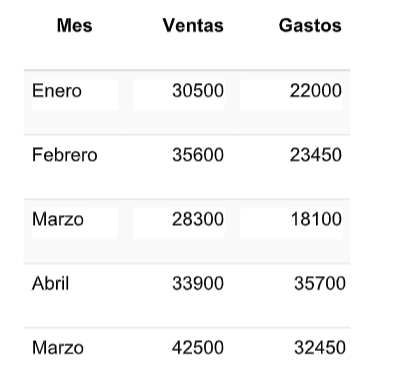

A continuación, generar nuevas columna:
1. Columna 1 = Gasto/Ventas*100.
2. Columna 2 = Si Ventas&gt;= 3000, imprimir “Meta Superada”,
caso contrario imprimir “Meta no Superada”.
3. Columna 3 = Si Gasto&gt;Ventas, calcular el sobre gasto.
4. Obtener el total de las ventas de los últimos 3 meses
5. Obtener el total de gastos de febrero a abril

In [61]:
Mes=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo']             # Construimos el dataframe
Ventas=[30500, 35600, 28300, 33900, 42500]
Gastos=[22000, 23450, 18100, 35700, 32450]
data=np.array([Mes, Ventas, Gastos])
data1=pd.DataFrame(data=data.T, columns=['Mes', 'Ventas', 'Gastos'])
data1

,Mes,Ventas,Gastos
0,Enero,30500,22000
1,Febrero,35600,23450
2,Marzo,28300,18100
3,Abril,33900,35700
4,Mayo,42500,32450


In [62]:
data1['Ventas'] = data1['Ventas'].astype('int')                # Indicamos el tipo de datos
data1['Gastos'] = data1['Gastos'].astype('int')

In [63]:
data1['Columna 1'] = data1['Gastos']/data1['Ventas']*100       # Dividimos los gastos entre las ventas y lo asignamos a la columna1
condiciones = [(data1['Ventas']>=3000),                        # Indicamos las condiciones
               (data1['Ventas']<3000)]
valores=['Meta Superada', 'Meta No Superada']                  # Indicamos nuestras valores asignar según las condiciones expuestas
data1['Columna 2'] = np.select(condiciones, valores)           # construimos la columna 2 en base a los valores asignados de acuerdo a los montos de ventas
data1['Columna 3'] = np.select([data1['Gastos']>data1[         # Construimos la columna 3 en base a la diferencia entre gastos y ventas y le asignamos una diferencia o un valor vacio
                                                      'Ventas'], data1['Gastos']<=data1['Ventas']], [data1['Gastos']-data1['Ventas'],''])
data1                                                          # Imprimimos nuestra dataframe

,Mes,Ventas,Gastos,Columna 1,Columna 2,Columna 3
0,Enero,30500,22000,72.131148,Meta Superada,
1,Febrero,35600,23450,65.870787,Meta Superada,
2,Marzo,28300,18100,63.957597,Meta Superada,
3,Abril,33900,35700,105.309735,Meta Superada,1800
4,Mayo,42500,32450,76.352941,Meta Superada,


In [64]:
data1.info()                                                   # Exponemos el tipo de datos con las que se esta trabajando

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Mes        5 non-null      object 
 1   Ventas     5 non-null      int64  
 2   Gastos     5 non-null      int64  
 3   Columna 1  5 non-null      float64
 4   Columna 2  5 non-null      object 
 5   Columna 3  5 non-null      object 
dtypes: float64(1), int64(2), object(3)
memory usage: 368.0+ bytes


In [65]:
data1.loc[data1['Mes'].isin(['Marzo', 'Abril',                 # Calculamos la suma de las ventas de los últimos 3 meses
                             'Mayo']),'Ventas'].sum() 

104700

In [66]:
data1.loc[data1['Mes'].isin(['Febrero',                        # Calculamos la suma de las gastos de febrero a abril
                             'Marzo', 'Abril']),'Gastos'].sum()

77250

##Ejercicio 4

Con el siguiente fichero Data - Riesgos.csv contiene información
de riesgo de clientes de un banco. Escribir un programa con los
siguientes requisitos:
1. Generar un DataFrame con los datos del fichero.
2. Mostrar por pantalla las dimensiones del DataFrame, el
número de datos que contiene, los nombres de sus columnas
y filas, los tipos de datos de las columnas, mostrar las 10
primeras filas y las 10 últimas filas, verificar si tiene datos
perdidos/nulos.
3. Extraer las 100 primeras columnas y almacenarlas en un
contenedor.

In [1]:
from google.colab import files                                   # Carganos el archivo a trabajar
files.upload()

Saving Data - Riesgos.xlsx to Data - Riesgos.xlsx


{'Data - Riesgos.xlsx': b'PK\x03\x04\x14\x00\x08\x08\x08\x00\xd060T\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00xl/drawings/drawing1.xml\x9d\xd0]n\xc20\x0c\x07\xf0\x13\xec\x0eU\xdeiZ\x18\x13C\x14^\xd0N0\x0e\xe0%n\x1b\x91\x8f\xca\x0e\xa3\xdc~\xd1J6i{\x01\x1em\xcb?\xf9\xef\xcdnt\xb6\xf8Db\x13|#\xea\xb2\x12\x05z\x15\xb4\xf1]#\x0e\xefo\xb3\x95(8\x82\xd7`\x83\xc7F\\\x90\xc5n\xfb\xb4\x195\xad\xcf\xbc\xa7"\xed{^\xa7\xb2\x11}\x8c\xc3ZJV=:\xe02\x0c\xe8\xd3\xb4\r\xe4 \xa6\x92:\xa9\t\xceIvV\xce\xab\xeaE\xf2@\x08\x9a{\xc4\xb8\x9f&\xe2\xea\xc1\x03\x9a\x03\xe3\xf3\xfeM\xd7\x84\xb65\n\xf7A\x9d\x1c\xfa8!\x84\x16b\xfa\x05\xf7f\xe0\xac\xa9\x07\xaeQ=P\xfc\x01\xc6\x7f\x823\x8a\x02\x876\x96*\xb8\xeb)\xd9HB\xfd<\t8\xfe\x1a\xf5\xdd\xc8R\xbe\xca\xd5_\xc8\xdd\x14\xc7\x01\x1dO\xc3,\xb9Cz\xc8\x87\xb1&^\xbe\x93eFw\xee\x81\xb7h\x03\x1d\x81\xcb\xc8\xb88\xf8\xe3\xdd\xb1*\xc96\xb5(+l\xb1^\xde\xad\xcc\xb3"\xb7_PK\x07\x08\x07bi\x83\x05\x01\x00\x00\x07\x03\x00\x00PK\x03\x04\x14\x00\x08\x08\x08\x00\xd0

In [67]:
df = pd.read_excel('Data - Riesgos.xlsx')                         # Leemos el archivo
df.head()                                                         # Mostramos las primeras filas

,ID,edad,meses,max_ant,ingreso,score,tipo_vivienda,zona,nivel,riesgo
0,2208,33.0,128.0,6.0,3230,192.0,2,3.0,2,1
1,2211,32.0,185.0,7.0,2930,217.0,2,1.0,5,1
2,2212,28.0,NaN,7.0,1883.7,202.0,2,1.0,2,1
3,2216,56.0,200.0,0.0,850,194.0,2,1.0,5,1
4,2218,32.0,131.0,65.0,3200,200.0,2,1.0,2,1


In [68]:
df.size                                                            # Imprimimos el número de datos

45000

In [69]:
df.columns                                                         # Imprimimos las columnas

Index(['ID', 'edad', 'meses', 'max_ant', 'ingreso', 'score', 'tipo_vivienda',
       'zona', 'nivel', 'riesgo'],
      dtype='object')

In [70]:
df.index                                                            # Imprimimos el indice

RangeIndex(start=0, stop=4500, step=1)

In [71]:
df.dtypes                                                           # Imprimimos el tipo de datos

ID                 int64
edad             float64
meses            float64
max_ant          float64
ingreso           object
score            float64
tipo_vivienda      int64
zona             float64
nivel              int64
riesgo             int64
dtype: object

In [72]:
df.head(10)                                                           # Imprimimos las 10 primeras filas

,ID,edad,meses,max_ant,ingreso,score,tipo_vivienda,zona,nivel,riesgo
0,2208,33.0,128.0,6.0,3230,192.0,2,3.0,2,1
1,2211,32.0,185.0,7.0,2930,217.0,2,1.0,5,1
2,2212,28.0,NaN,7.0,1883.7,202.0,2,1.0,2,1
3,2216,56.0,200.0,0.0,850,194.0,2,1.0,5,1
4,2218,32.0,131.0,65.0,3200,200.0,2,1.0,2,1
5,2219,34.0,145.0,6.0,7000,196.0,2,5.0,2,1
6,2226,NaN,114.0,0.0,2171-05-01 00:00:00,178.0,2,2.0,1,1
7,2227,27.0,116.0,0.0,800,169.0,2,1.0,5,1
8,2228,26.0,182.0,6.0,3150,190.0,4,3.0,5,1
9,2230,25.0,154.0,1.0,2600,189.0,2,1.0,2,1


In [73]:
df.tail(10)                                                            # Imprimimos las 10 últimas filas

,ID,edad,meses,max_ant,ingreso,score,tipo_vivienda,zona,nivel,riesgo
4490,1486,59.0,288.0,0.0,30000,207.0,2,1.0,2,0
4491,1487,55.0,294.0,57.0,9300,238.0,4,1.0,2,0
4492,1488,53.0,148.0,106.0,30000,219.0,4,1.0,2,0
4493,1491,29.0,198.0,94.0,5250,214.0,2,1.0,2,0
4494,1493,32.0,195.0,41.0,7500,219.0,2,1.0,2,0
4495,1494,54.0,510.0,87.0,24000,214.0,2,1.0,2,0
4496,1495,63.0,305.0,99.0,9880.73,219.0,2,5.0,2,0
4497,1496,48.0,194.0,124.0,23000,224.0,4,1.0,2,0
4498,1497,39.0,245.0,121.0,12450,240.0,4,5.0,2,0
4499,1499,65.0,674.0,38.0,20000,238.0,4,5.0,2,0


In [74]:
df.isnull().sum()                                                      # Imprimimos los datos nulos por columna

ID                0
edad             13
meses             6
max_ant           4
ingreso           5
score             5
tipo_vivienda     0
zona              6
nivel             0
riesgo            0
dtype: int64

In [75]:
df2=df.loc[:99, :]                                                       # Extraer las 100 primeras columnas y almacenarlas en un contenedor
df2                                                                      # Imprimos la nueva dataframe

,ID,edad,meses,max_ant,ingreso,score,tipo_vivienda,zona,nivel,riesgo
0,2208,33.0,128.0,6.0,3230,192.0,2,3.0,2,1
1,2211,32.0,185.0,7.0,2930,217.0,2,1.0,5,1
2,2212,28.0,NaN,7.0,1883.7,202.0,2,1.0,2,1
3,2216,56.0,200.0,0.0,850,194.0,2,1.0,5,1
4,2218,32.0,131.0,65.0,3200,200.0,2,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...
95,2387,41.0,141.0,0.0,3420.36,214.0,4,2.0,1,1
96,2389,29.0,159.0,17.0,1157.06,163.0,2,4.0,2,1
97,2391,27.0,122.0,NaN,2000,188.0,2,1.0,2,1
98,2392,35.0,111.0,0.0,812.53,177.0,2,1.0,5,1
